In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from matplotlib import rc
import matplotlib.font_manager
from sklearn.decomposition import PCA
from sklearn import preprocessing
import glob
from functools import reduce

In [19]:
paths = glob.glob("../results/wild_type_A/potential_umis/*/counts.tsv")

In [20]:
paths

['../results/wild_type_A/potential_umis/11/counts.tsv',
 '../results/wild_type_A/potential_umis/13/counts.tsv',
 '../results/wild_type_A/potential_umis/9/counts.tsv',
 '../results/wild_type_A/potential_umis/12/counts.tsv',
 '../results/wild_type_A/potential_umis/10/counts.tsv']

In [21]:
samples = {}

In [22]:
dfs = []
for path in paths:
    sample_name = path.split("/")[2]
    kmer = path.split("/")[4]
    samples[sample_name] = path
    print(f"Working on {sample_name} with kmer {kmer}")
    df = pd.read_csv(path, header=0, sep="\t")
    df.set_index("potential_umi", inplace=True)
    df.columns = [sample_name+ "_kmer_" + kmer]
    dfs.append(df)

Working on wild_type_A with kmer 11
Working on wild_type_A with kmer 13
Working on wild_type_A with kmer 9
Working on wild_type_A with kmer 12
Working on wild_type_A with kmer 10


In [23]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='potential_umi', how="outer"), dfs)

In [24]:
df_final.head()

,wild_type_A_kmer_11,wild_type_A_kmer_13,wild_type_A_kmer_9,wild_type_A_kmer_12,wild_type_A_kmer_10
potential_umi,,,,,
CCCCCCCCCCC,272.0,NaN,NaN,NaN,NaN
CGCCGCGCGCC,191.0,NaN,NaN,NaN,NaN
CCCCCTCCCCC,188.0,NaN,NaN,NaN,NaN
CGCCGCGCCCC,171.0,NaN,NaN,NaN,NaN
CGCCCCCCCCC,168.0,NaN,NaN,NaN,NaN


In [25]:
kmers = list(np.arange(9,14))

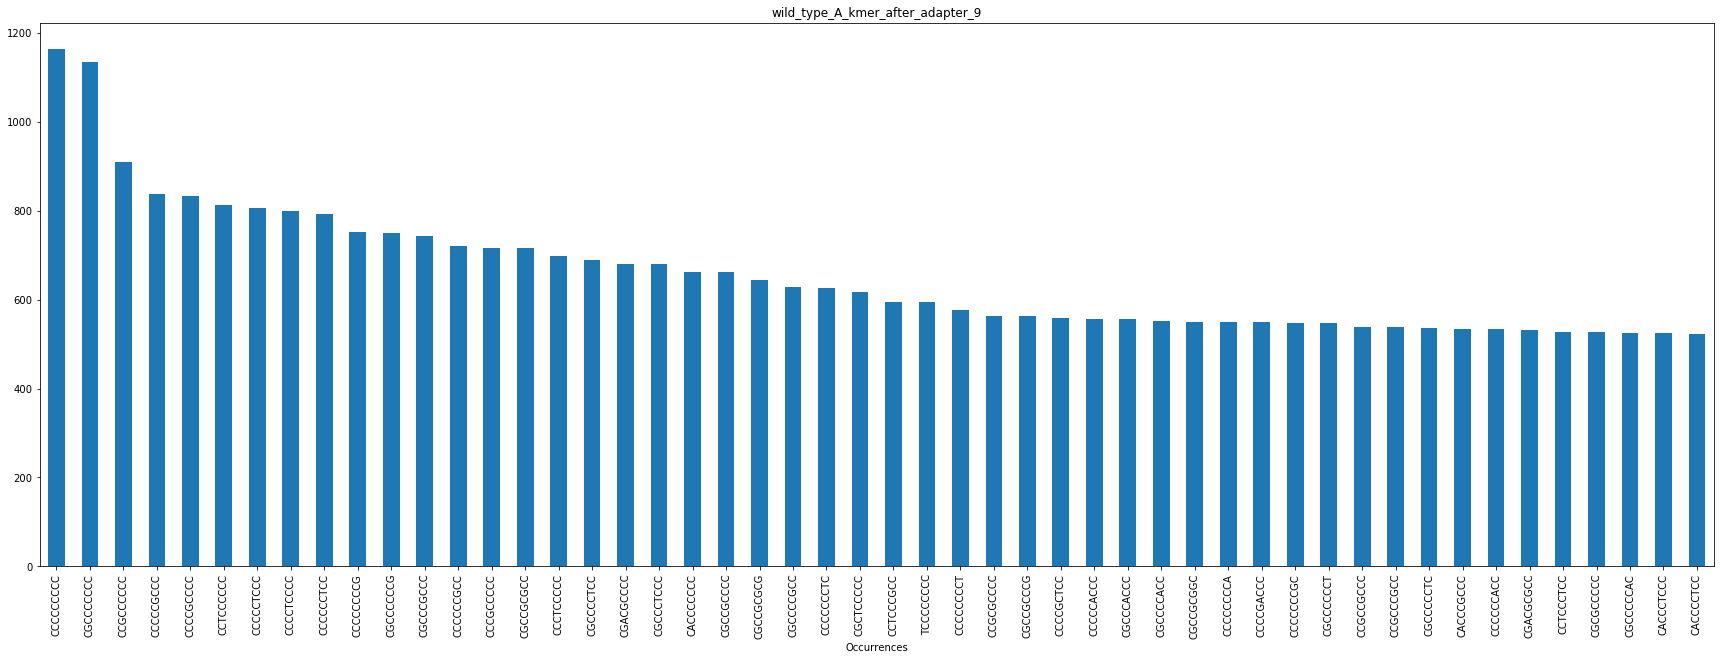

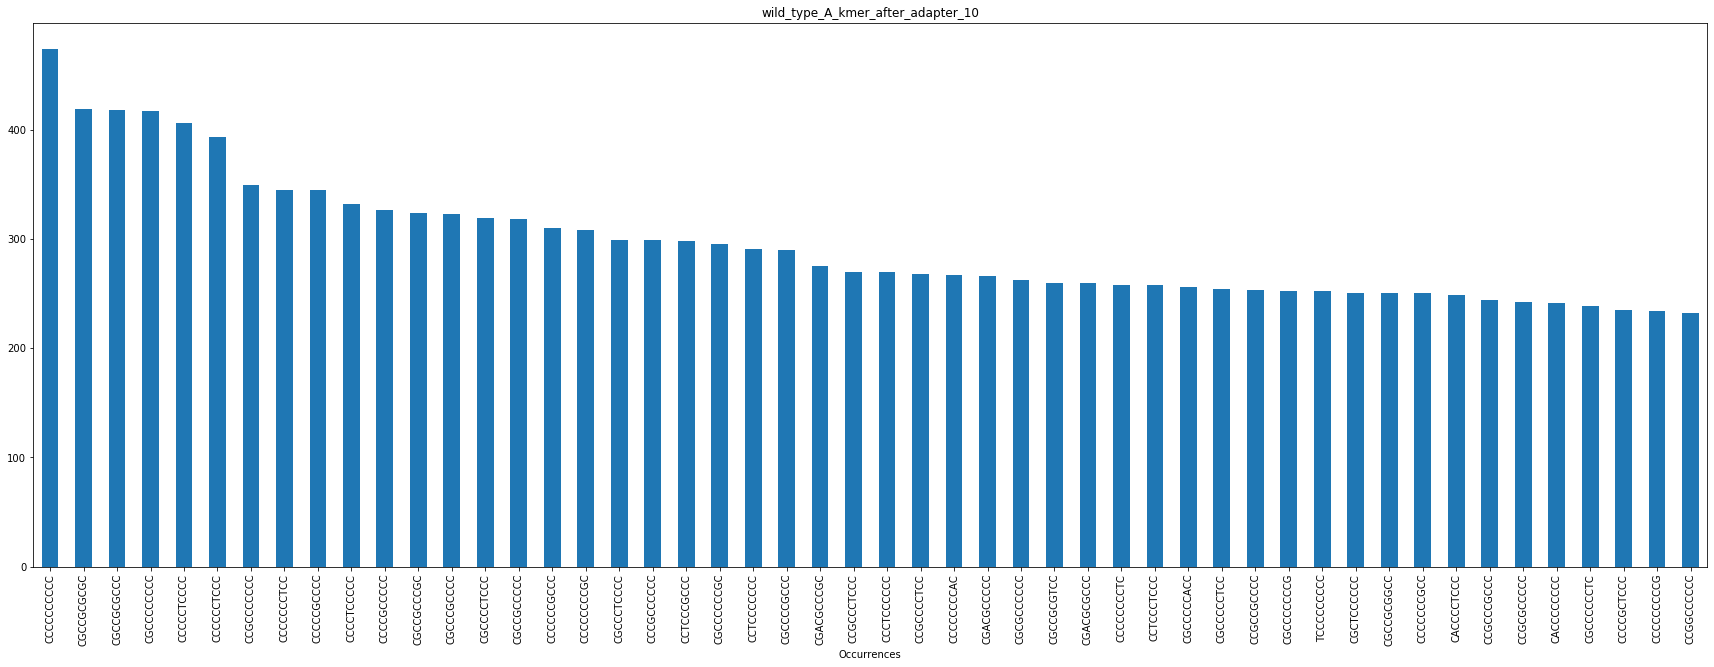

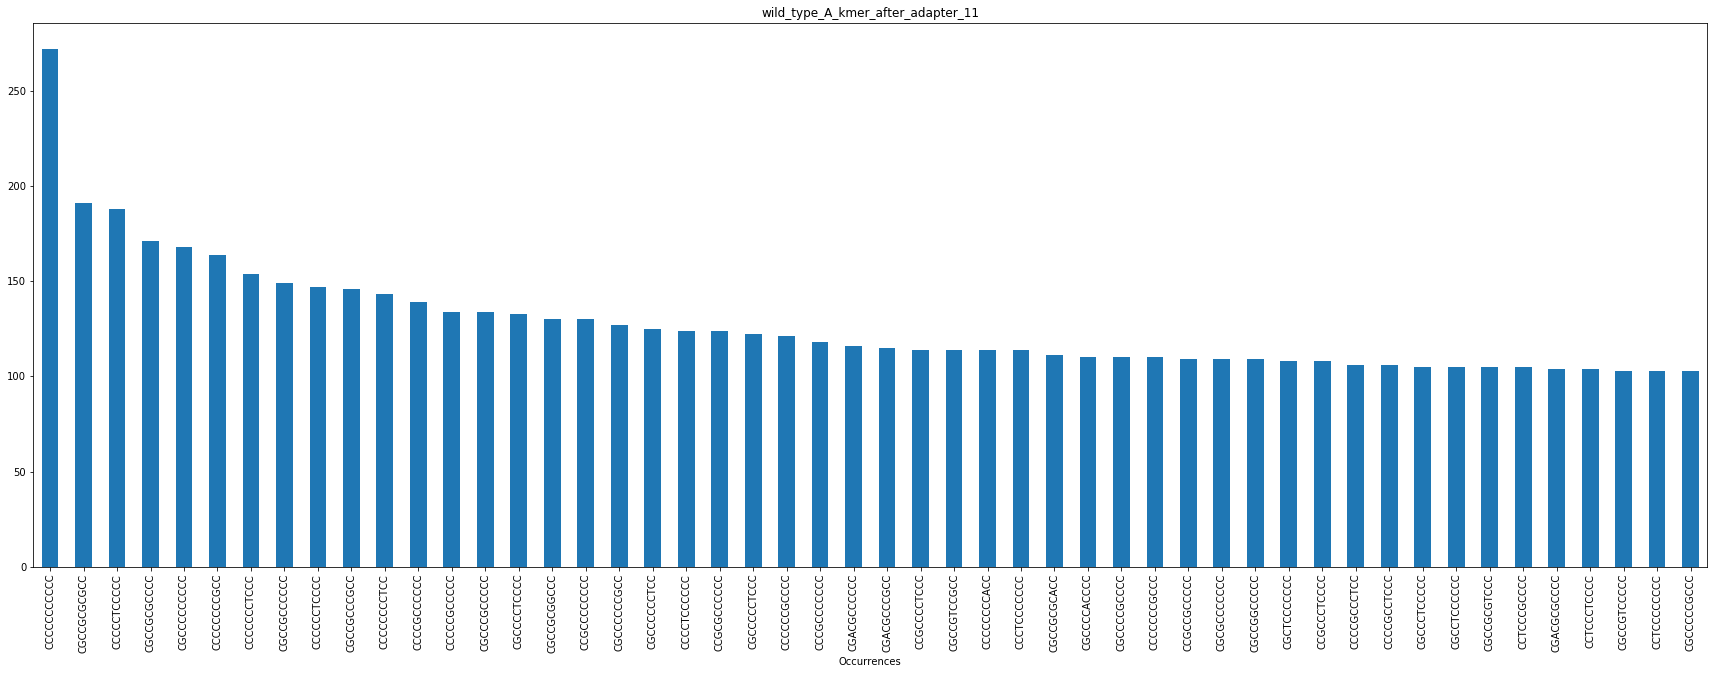

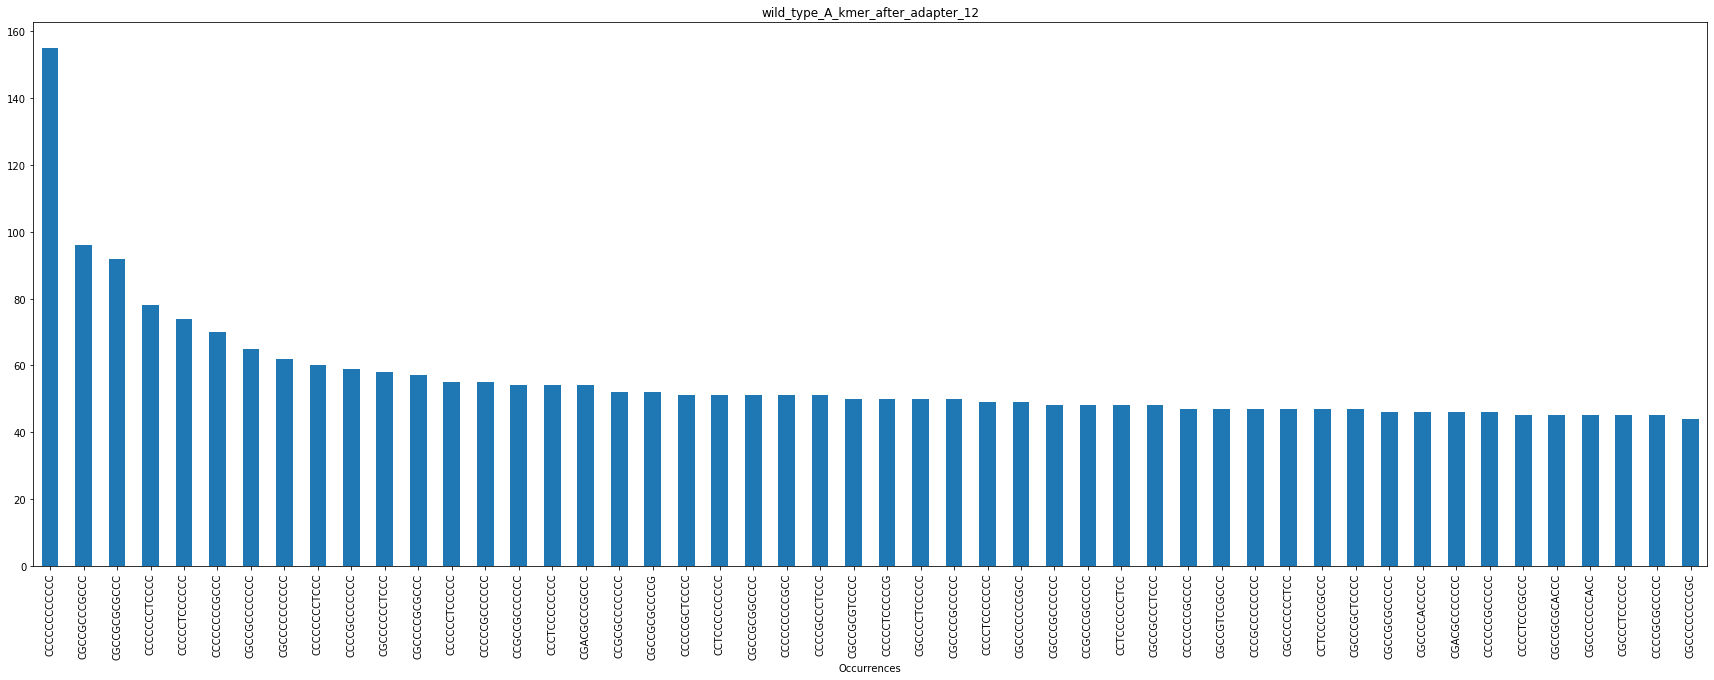

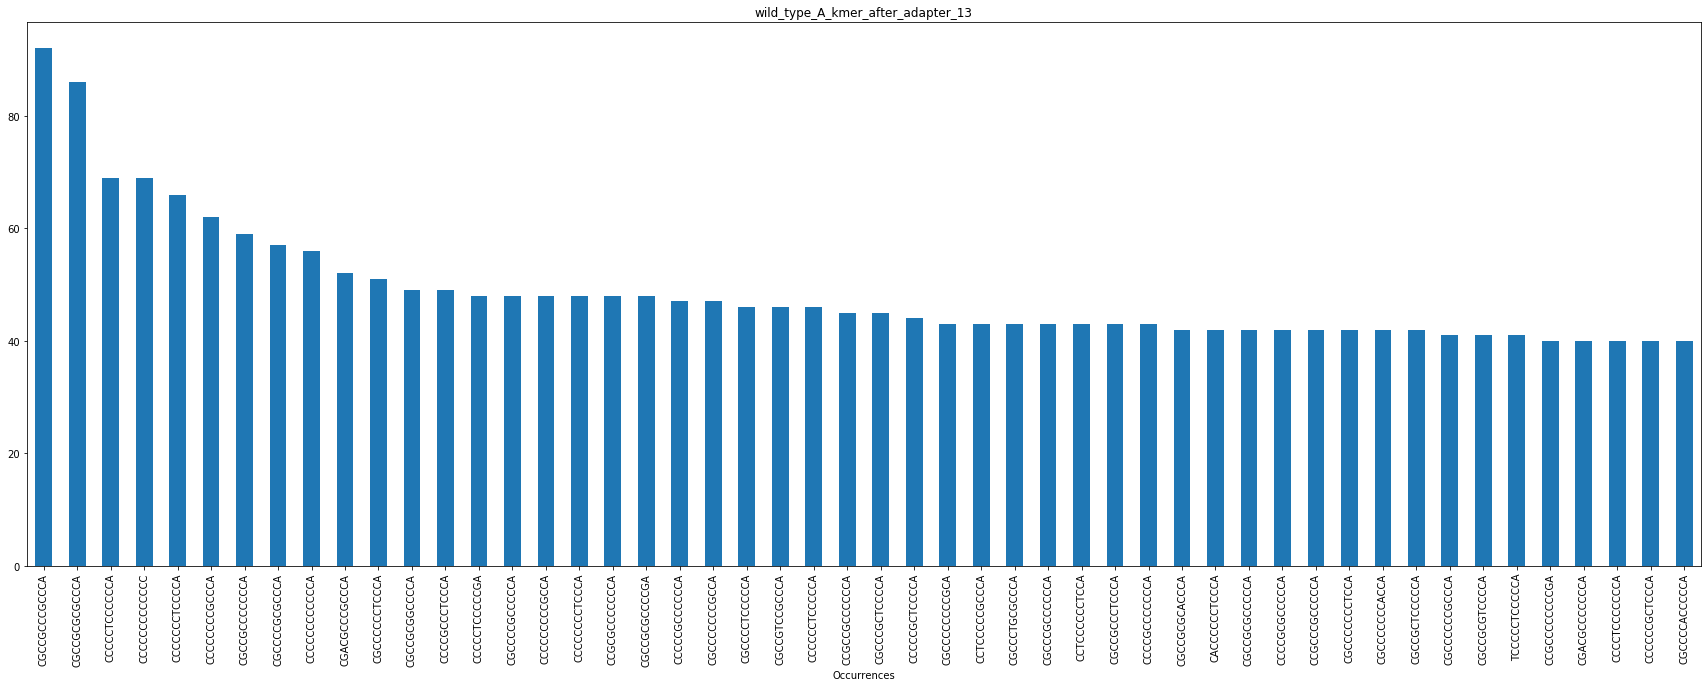

In [26]:
for kmer in kmers:
    top_n = df_final[f"wild_type_A_kmer_{str(kmer)}"].nlargest(50)
    plt.figure(figsize=(30,10))
    top_n.plot(kind="bar")
    plt.title(f"wild_type_A_kmer_after_adapter_{str(kmer)}")
    plt.xlabel("Potential umis")
    plt.xlabel("Occurrences")

# Alternative approach

In [27]:
df = pd.read_csv("../results/wild_type_A/frequency_for_UMI_detection/frequency.tsv", header=0, sep="\t", index_col=0)

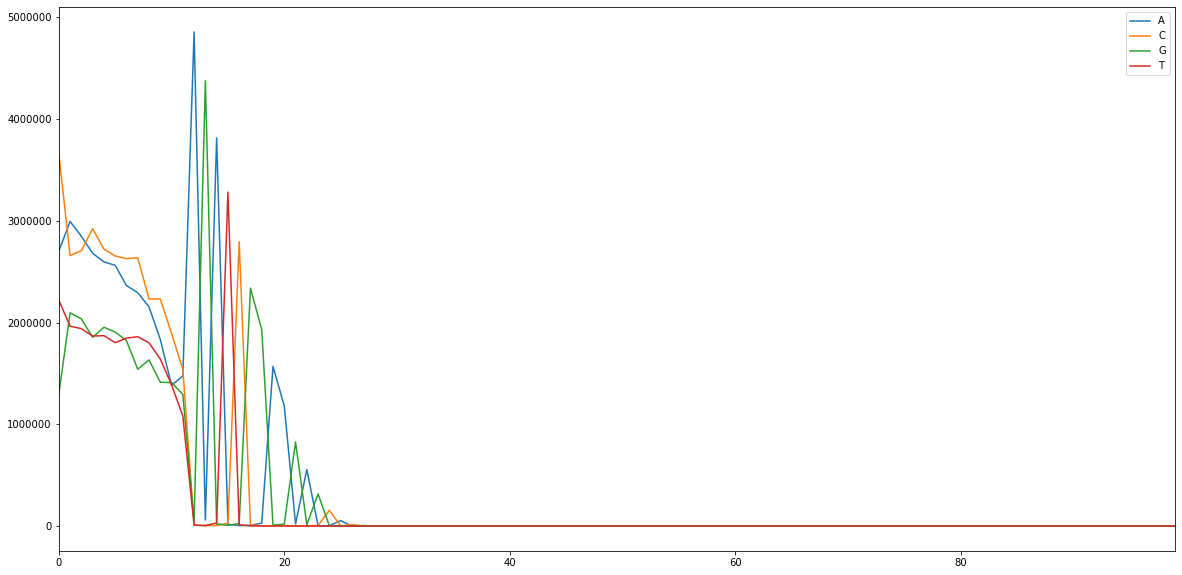

In [28]:
df.plot(figsize=(20,10))

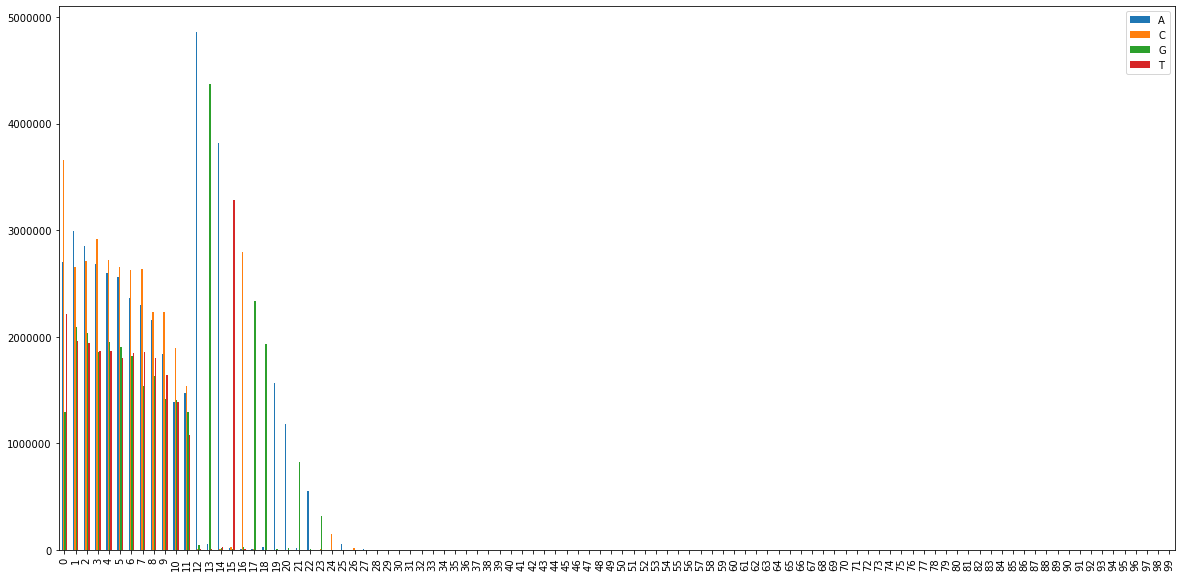

In [29]:
df.plot(figsize=(20,10), kind="bar")

# Stats

In [37]:
df = pd.read_csv("../results/wild_type_A/split_reads/stats.tsv", header=0, sep="\t")

In [38]:
df

,category,number_of_reads
0,adapter_missing,1983123
1,umi_truncated,2894005
2,adapter_and_umi_present,7122667


In [39]:
df = pd.read_csv("../results/wild_type_A/split_reads/stats.tsv", header=0, sep="\t")

In [40]:
df

,category,number_of_reads
0,adapter_missing,1983123
1,umi_truncated,1683958
2,adapter_and_umi_present,8332714
